In [1]:
!pip install pycaret

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
     |████████████████████████████████| 261 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 243 kB 748 kB/s eta 0:00:01
     |████████████████████████████████| 220 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 271 kB 61.8 MB/s eta 0:00:01
  Using cached https://mirrors.aliyun.com/pypi/packages/45/71/507b8dbbe3ee6f93c0356c3e5e902e0f598c02d919ad3116e16559eb011f/spacy-2.3.5.tar.gz (5.8 MB)
  Installing build dependencies ... error
  ERROR: Command errored out with exit status -9:
   command: /Users/fyenne/miniforge3/envs/tf24/bin/python3.8 /Users/fyenne/miniforge3/envs/tf24/lib/python3.8/site-packages/pip install --ignore-installed --no-user --prefix /private/var/folders/3g/xmfmfdws08g7_rv6hwgr8dpw0000gn/T/pip-build-env-jk1elt72/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://mirrors.aliyun.com/pypi/simple/ -- setuptools 'cython>=0.25' 'cymem>=2.0.2,<2.1.0' 'p

In [4]:
# check pycaret version
import pycaret
print('PyCaret: %s' % pycaret.__version__)


ModuleNotFoundError: No module named 'pycaret'

In [5]:
1

1

In [6]:
import tensorflow as tf

In [7]:
# import tensorflow as tf
import time

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


start = time.time()

model.fit(x_train, y_train, epochs=5)

end = time.time()

model.evaluate(x_test, y_test)
print(end - start)

Epoch 1/5
1875/1875 [==============================] - 1s 437us/step - loss: 0.5325 - accuracy: 0.8429

In [8]:
tf.__version__

'2.4.0-rc0'

---
# learning start1
https://tf.wiki/zh_hans/basic/basic.html

In [5]:
import numpy as np
tensor_1d = np.array([1.3, 1, 4.0, 23.99])
print(tensor_1d)

[ 1.3   1.    4.   23.99]


In [9]:
random_float = tf.random.uniform(shape=())
# 定义一个有2个元素的零向量
zero_vector = tf.zeros(shape=(2))

# 定义两个2×2的常量矩阵
A = tf.constant([[1., 2.], [3., 4.]])
B = tf.constant([[5., 6.], [7., 8.]])

In [18]:
# tf.random.uniform(shape = (1,3))
tf.zeros(shape=(2))

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0., 0.], dtype=float32)>

In [9]:
print(A.shape)      # 输出(2, 2)，即矩阵的长和宽均为2
print(A.dtype)      # 输出<dtype: 'float32'>
print(A.numpy())


(2, 2)
<dtype: 'float32'>
[[1. 2.]
 [3. 4.]]


## 自动求导！
tape.gradient(y, x)

In [6]:
import tensorflow as tf

x = tf.Variable(initial_value=3.)
# x ==> variable with an initial value
with tf.GradientTape() as tape:     # 在 tf.GradientTape() 的上下文内，所有计算步骤都会被记录以用于求导
    y = tf.square(x) + x
y_grad = tape.gradient(y, x)        # 计算y关于x的导数
print(y, y_grad)

tf.Tensor(12.0, shape=(), dtype=float32) tf.Tensor(7.0, shape=(), dtype=float32)


calculate
$L(w,b) = ||Xw + b - y||^2$

In [17]:
X = tf.constant([[1., 2.], [3., 4.]])
y = tf.constant([[1.], [2.]])
w = tf.Variable(initial_value=[[1.], [2.]])
b = tf.Variable(initial_value=1.)
with tf.GradientTape() as tape:
    L = tf.reduce_sum(tf.square(tf.matmul(X, w) + b - y))
w_grad, b_grad = tape.gradient(L, [w, b])        # 计算L(w, b)关于w, b的偏导数
print(L, w_grad, b_grad)

tf.Tensor(125.0, shape=(), dtype=float32) tf.Tensor(
[[ 70.]
 [100.]], shape=(2, 1), dtype=float32) tf.Tensor(30.0, shape=(), dtype=float32)


## 线性回归

In [22]:
import numpy as np

X_raw = np.array([2013, 2014, 2015, 2016, 2017], dtype=np.float32)
y_raw = np.array([12000, 14000, 15000, 16500, 17500], dtype=np.float32)

归一化 <br>$y = ax + b$


2013 | 2014 | 2015|2016|2017
--- | --- | ---| ---| ---
12000|14000|15000|16500|17500

In [24]:
X = (X_raw - X_raw.min()) / (X_raw.max() - X_raw.min())
y = (y_raw - y_raw.min()) / (y_raw.max() - y_raw.min())

In [25]:
X = tf.constant(X)
y = tf.constant(y)

a = tf.Variable(initial_value=0.)
b = tf.Variable(initial_value=0.)
variables = [a, b]

num_epoch = 10000
optimizer = tf.keras.optimizers.SGD(learning_rate=5e-4)
for e in range(num_epoch):
    # 使用tf.GradientTape()记录损失函数的梯度信息
    with tf.GradientTape() as tape:
        y_pred = a * X + b
        loss = tf.reduce_sum(tf.square(y_pred - y))
    # TensorFlow自动计算损失函数关于自变量（模型参数）的梯度
    grads = tape.gradient(loss, variables)
    # TensorFlow自动根据梯度更新参数
    optimizer.apply_gradients(
        grads_and_vars=zip(grads, variables))

# a,b 最优解

zip() 函数是 Python 的内置函数。用自然语言描述这个函数的功能很绕口，但如果举个例子就很容易理解了：如果 a = [1, 3, 5]， b = [2, 4, 6]，那么 zip(a, b) = [(1, 2), (3, 4), ..., (5, 6)]

---

## TensorFlow 模型建立与训练

+ 模型的构建： tf.keras.Model 和 tf.keras.layers

* 模型的损失函数： tf.keras.losses

* 模型的优化器： tf.keras.optimizer

* 模型的评估： tf.keras.metrics

In [19]:
X = tf.constant([[1.0, 1.0, 1.0], [2.0, 2.0, 2.0]])
y = tf.constant([[10.0], [20.0]])


class Linear(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.dense = tf.keras.layers.Dense(
            units=1,
            activation=None,
            kernel_initializer=tf.zeros_initializer(),
            bias_initializer=tf.zeros_initializer()
        )

    def call(self, input):
        output = self.dense(input)
        return output


# 以下代码结构与前节类似
model = Linear()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
for i in range(100):
    with tf.GradientTape() as tape:
        y_pred = model(X)      # 调用模型 y_pred = model(X) 而不是显式写出 y_pred = a * X + b
        loss = tf.reduce_mean(tf.square(y_pred - y))
    grads = tape.gradient(loss, model.variables)    # 使用 model.variables 这一属性直接获得模型中的所有变量
    optimizer.apply_gradients(grads_and_vars=zip(grads, model.variables))
print(model.variables)

[<tf.Variable 'linear/dense_2/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[3.0281339],
       [3.0281339],
       [3.0281339]], dtype=float32)>, <tf.Variable 'linear/dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([1.5078537], dtype=float32)>]


## kaggle Linear model



In [2]:
from tensorflow import keras
from tensorflow.keras import layers


# Create a network with 1 linear unit
# data.shape
# input_shape = data.shape[1] - 1 #
# 剪掉y，
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3]) #output first
])

In [42]:
w, b = model.weights
print("Weights\n{}\n\nBias\n{}".format(w, b))

Weights
<tf.Variable 'dense_3/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.21775842],
       [-0.00248146],
       [-0.23719084]], dtype=float32)>

Bias
<tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


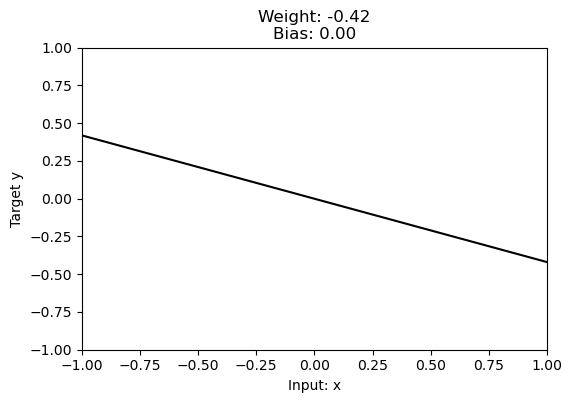

In [48]:
# import tensorflow as tf
# import matplotlib.pyplot as plt
#
# w, b = model.weights # you could also use model.get_weights() here
# plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
# plt.show()

## Deep Neural Networks

In [5]:
from tensorflow.keras import layers

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer
    layers.Dense(units=1),
])

# "elu" "selu"

## Stochastic Gradient Descent

We've described the problem we want the network to solve, but now we need to say how to solve it. This is the job of the optimizer. The optimizer is an algorithm that adjusts the weights to minimize the loss.

Virtually all of the optimization algorithms used in deep learning belong to a family called stochastic gradient descent. They are iterative algorithms that train a network in steps. One step of training goes like this:

Sample some training data and run it through the network to make predictions.
Measure the loss between the predictions and the true values.
Finally, adjust the weights in a direction that makes the loss smaller.
Then just do this over and over until the loss is as small as you like (or until it won't decrease any further.)

Each iteration's sample of training data is called a **minibatch** (or often just "batch"), while a complete round of the training data is called an epoch. The number of *epochs* you train for is how many times the network will see each training example.

The animation shows the linear model from Lesson 1 being trained with SGD. The pale red dots depict the entire training set, while the solid red dots are the minibatches. Every time SGD sees a new minibatch, it will shift the weights (w the slope and b the y-intercept) toward their correct values on that batch. Batch after batch, the line eventually converges to its best fit. You can see that the loss gets smaller as the weights get closer to their true values.

Notice that the line only makes a small shift in the direction of each batch (instead of moving all the way). The size of these shifts is determined by the learning rate. A smaller learning rate means the network needs to see more minibatches before its weights converge to their best values.

The learning rate and the size of the minibatches are the two parameters that have the largest effect on how the SGD training proceeds. Their interaction is often subtle and the right choice for these parameters isn't always obvious. (We'll explore these effects in the exercise.)

Fortunately, for most work it won't be necessary to do an extensive hyperparameter search to get satisfactory results. Adam is an SGD algorithm that has an adaptive learning rate that makes it suitable for most problems without any parameter tuning (it is "self tuning", in a sense). Adam is a great general-purpose optimizer.

In [ ]:
model.compile(
    optimizer="adam", # Adam SGD algorithm
    # automatically tune learning rate and minibatch size
    loss="mae", # or rmse?
)

### red wine eg.

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

input_shape = [X_train.shape[2]]
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [20]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [27]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)


<RangeDataset shapes: (), types: tf.int64>

In [ ]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();


In [3]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

